<a href="https://colab.research.google.com/github/Calista-F/D-and-C/blob/master/Signal_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd

from math import log10, sqrt
import cv2
import numpy as np

In [45]:
pip install sewar

## ECG signal

In [ ]:
"""
wavelet based denoising of ECG signal
https://www.youtube.com/watch?v=HSG-gVALa84

"""


x = pywt.data.ecg().astype(float)/256

sigma = 0.05
x_noisy = x + sigma * np.random.randn(x.size)
                                       
#DENOISING

x_denoised = denoise_wavelet(x_noisy, method = 'BayesShrink', mode ='soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma = 'True')

In [ ]:
np.random.randn?

In [ ]:
denoise_wavelet?

Text(0.5, 1.0, 'ECG data')

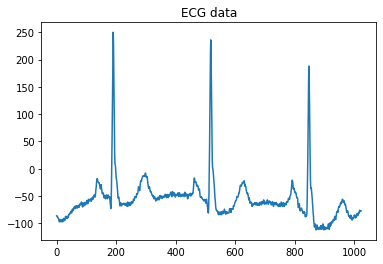

In [ ]:
plt.plot(pywt.data.ecg().astype(float))
plt.title('ECG data')

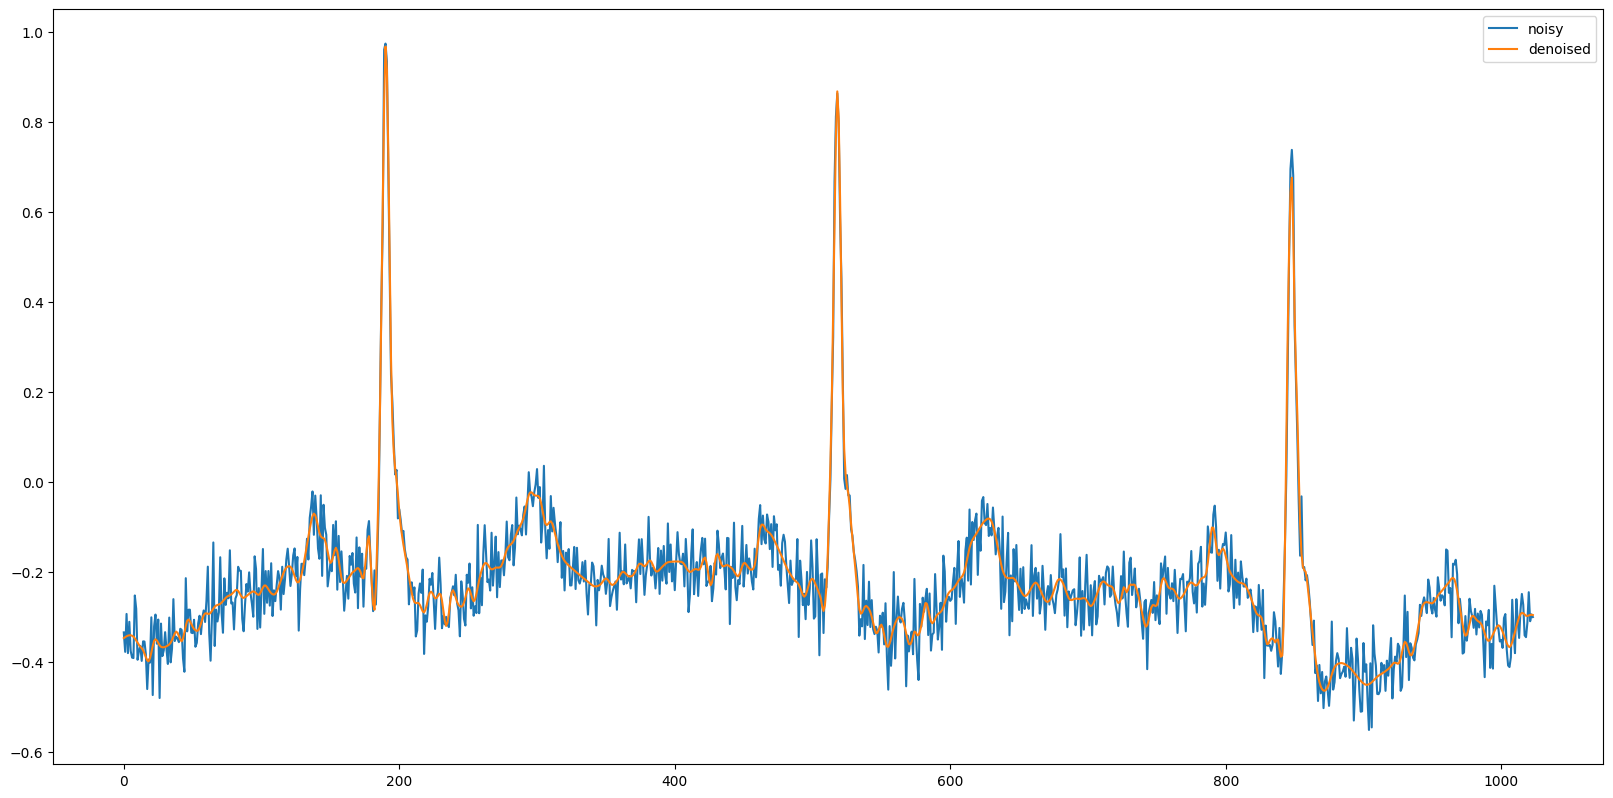

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
plt.plot(x_noisy, label = "noisy")
plt.plot(x_denoised, label = "denoised")
plt.legend()
plt.show()

# CCSN simmulation by Dimmelmeier 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ccsn_path = '/content/drive/MyDrive/Signals/CCSN_signal96_dist5.0.csv'

In [7]:
ccsn_df = pd.read_csv(ccsn_path, names= ['time','signal + noise','signal template'])
ccsn_df.drop(ccsn_df.tail(1).index,inplace=True)
print(ccsn_df)

               time  signal + noise  signal template
0      1.130000e+09    5.820000e-21              0.0
1      1.130000e+09    1.180000e-23              0.0
2      1.130000e+09   -2.850000e-21              0.0
3      1.130000e+09   -3.680000e-21              0.0
4      1.130000e+09   -1.570000e-22              0.0
...             ...             ...              ...
49147  1.130000e+09    4.570000e-21              0.0
49148  1.130000e+09    4.020000e-21              0.0
49149  1.130000e+09    1.480000e-20              0.0
49150  1.130000e+09   -1.640000e-21              0.0
49151  1.130000e+09    6.840000e-21              0.0

[49152 rows x 3 columns]


0       0.000438
1       0.000219
2       0.000301
3       0.000048
4       0.000119
          ...   
4996    0.000000
4997    0.000000
4998    0.000000
4999    0.000000
5000    0.000000
Name: signal template, Length: 5001, dtype: float64


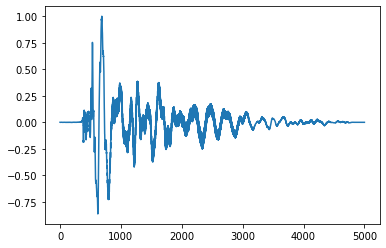

In [24]:
signal_df = ccsn_df['signal template'].loc[20000:25000]
signal_df = signal_df/max(signal_df)
signal_df.reset_index(drop='True',inplace=True)
plt.plot(signal_df)
print(signal_df)

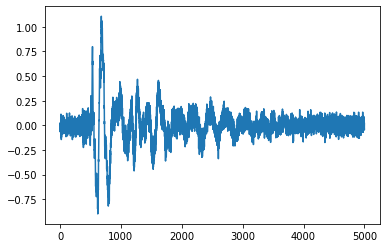

In [28]:
sigma = 0.05
ccsnx_noisy = signal_df + sigma * np.random.randn(signal_df.size)
plt.plot(ccsnx_noisy)

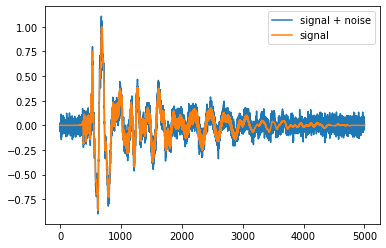

In [49]:
plt.plot(ccsnx_noisy, label ='signal + noise')
plt.plot(signal_df, label ='signal')
plt.legend()

In [30]:
ccsnx_denoised_b = denoise_wavelet(ccsnx_noisy, method = 'BayesShrink', mode ='soft', wavelet_levels = 5, wavelet = 'sym8', rescale_sigma = 'True')
ccsnx_denoised_v = denoise_wavelet(ccsnx_noisy, method = 'VisuShrink', mode ='soft', wavelet_levels = 5, wavelet = 'sym8', rescale_sigma = 'True')

In [77]:
denoise_wavelet?

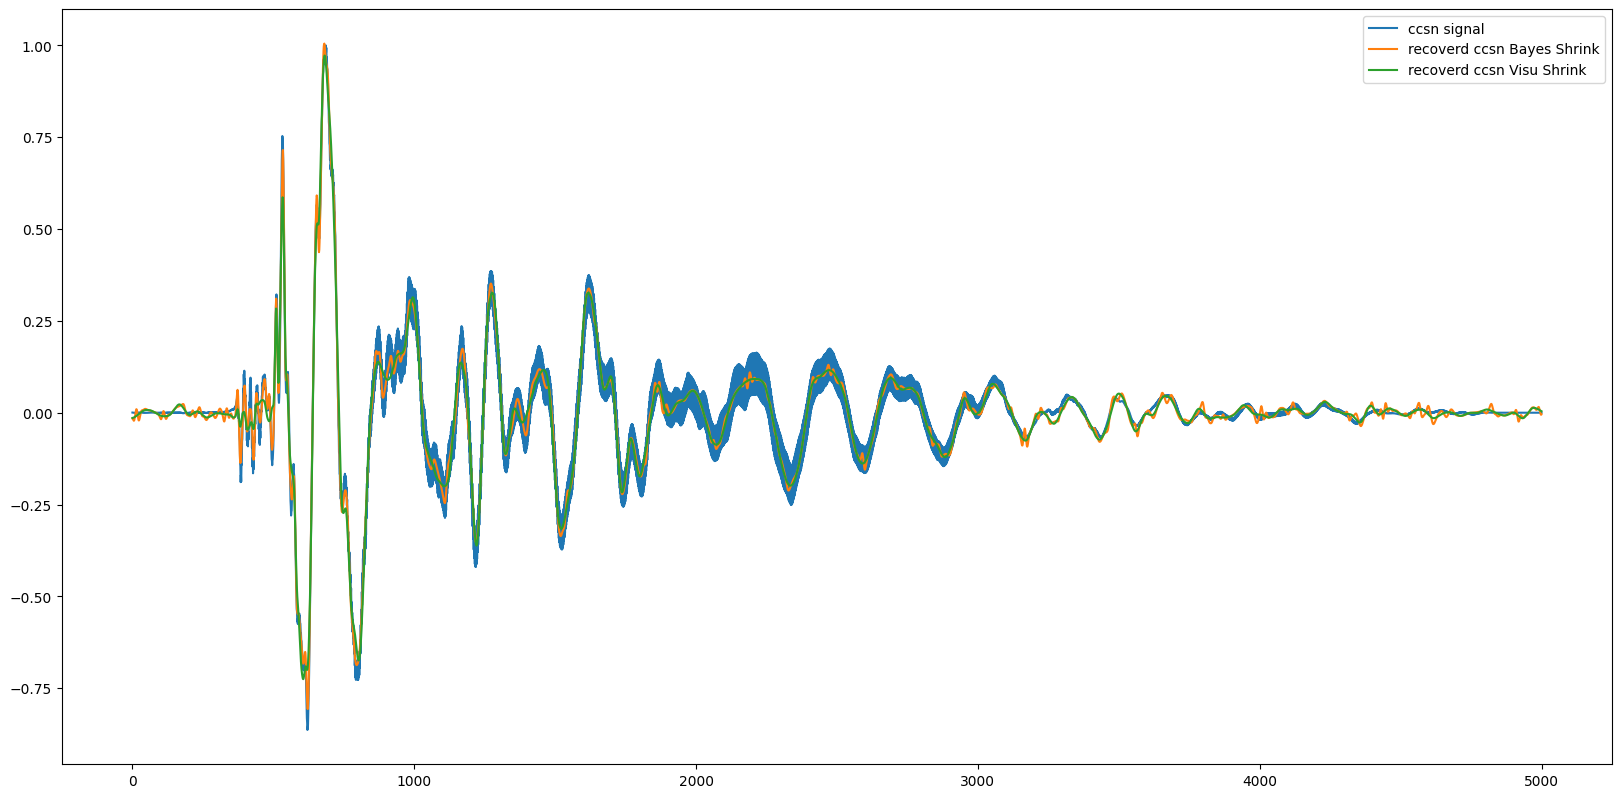

In [31]:
plt.figure(figsize=(20,10), dpi=100)
plt.plot(signal_df, label='ccsn signal')
plt.plot(ccsnx_denoised_b, label = 'recoverd ccsn Bayes Shrink')
plt.plot(ccsnx_denoised_v, label = 'recoverd ccsn Visu Shrink')
plt.legend()
plt.show()

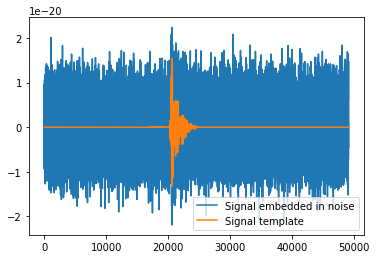

In [41]:
torres_df = ccsn_df['signal + noise']
plt.plot(ccsn_df['signal + noise'], label ='Signal embedded in noise')
plt.plot(ccsn_df['signal template'], label ='Signal template')
plt.legend()

In [92]:
torres_clean_VS = denoise_wavelet(torres_df, method = 'VisuShrink', mode ='soft', wavelet_levels = 6, wavelet = 'sym8', rescale_sigma = 'True')
torres_clean_BS = denoise_wavelet(torres_df, method = 'BayesShrink', mode ='soft', wavelet_levels = 6, wavelet = 'sym8', rescale_sigma = 'True')

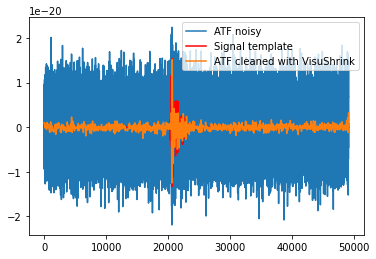

In [89]:
plt.plot(torres_df, label ='ATF noisy')
plt.plot(ccsn_df['signal template'], label ='Signal template',color = 'r')
plt.plot(torres_clean_VS, label ='ATF cleaned with VisuShrink')
plt.legend()

In [59]:
denoise_wavelet?

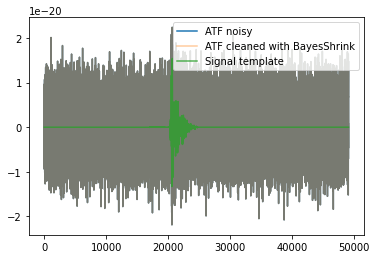

In [76]:
plt.plot(torres_df, label ='ATF noisy')
plt.plot(torres_clean_BS, label ='ATF cleaned with BayesShrink', alpha = 0.4)
plt.plot(ccsn_df['signal template'], label ='Signal template',alpha=0.8)
plt.legend()

## Unsuccessful trials

In [34]:
def compute_ssim(im1, im2, k1=0.01, k2=0.03, win_size=11, L=255):
    if not im1.shape == im2.shape:
        raise ValueError("Input Imagees must have the same dimensions")
    if len(im1.shape) > 2:
        raise ValueError("Please input the images with 1 channel")

    M, N = im1.shape
    C1 = (k1*L)**2
    C2 = (k2*L)**2
    window = matlab_style_gauss2D(shape=(win_size,win_size), sigma=1.5)
    window = window/np.sum(np.sum(window))

    if im1.dtype == np.uint8:
        im1 = np.double(im1)
    if im2.dtype == np.uint8:
        im2 = np.double(im2)

    mu1 = filter2(im1, window, 'valid')
    mu2 = filter2(im2, window, 'valid')
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = filter2(im1*im1, window, 'valid') - mu1_sq
    sigma2_sq = filter2(im2*im2, window, 'valid') - mu2_sq
    sigmal2 = filter2(im1*im2, window, 'valid') - mu1_mu2

    ssim_map = ((2*mu1_mu2+C1) * (2*sigmal2+C2)) / ((mu1_sq+mu2_sq+C1) * (sigma1_sq+sigma2_sq+C2))

    return np.mean(np.mean(ssim_map))

In [35]:
compute_ssim(signal_df, ccsnx_denoised_b, k1=0.01, k2=0.03, win_size=11, L=255)

ValueError: ignored

## update

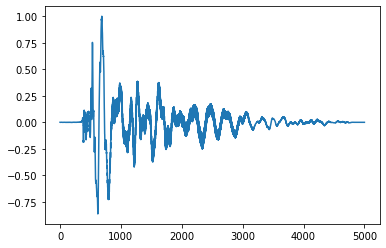

In [93]:
signal_df = ccsn_df['signal template'].loc[20000:25000]
signal_df = signal_df/max(signal_df)
signal_df.reset_index(drop='True',inplace=True)
plt.plot(signal_df)

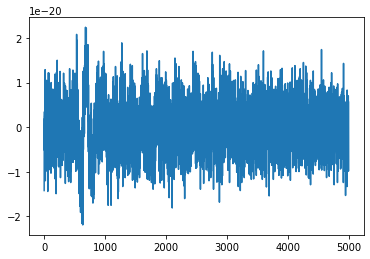

In [104]:
torres_noisy = torres_df.loc[20000:25000]
torres_noisy.reset_index(drop='True',inplace=True)
plt.plot(torres_noisy)

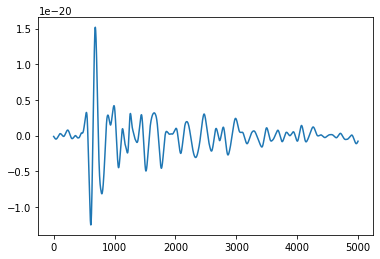

In [105]:
torres_cleaned = pd.DataFrame(torres_clean_VS).loc[20000:25000]
torres_cleaned.reset_index(drop='True',inplace=True)
plt.plot(torres_cleaned)

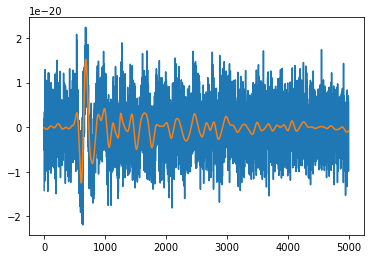

In [106]:

plt.plot(torres_noisy)
plt.plot(torres_cleaned)

In [37]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [78]:
PSNR(ccsn_df['signal template'], torres_clean_BS)

453.9682362268667

In [80]:
PSNR(ccsn_df['signal template'], torres_clean_VS)

471.91203234498425

In [66]:
PSNR(signal_df, ccsnx_noisy)

73.98614042894849

In [38]:
PSNR(signal_df, ccsnx_denoised_b)

77.72626937717146

In [39]:
PSNR(signal_df, ccsnx_denoised_v)

76.55585323012167

In [48]:
from sewar.full_ref import psnr